# Foundations of Data Science
# Exercise Sheet 1

Download	 the	 file	 tvads.csv from	 ISIS.	 The	 file	 consists	 oft	 two columns.	 The	 first	 column	 contains	 TV	
advertising	costs (in	1000$),	the	second	column	contains	the	corresponding	numbers of	sold	products	(in	1000).

# Exercise 1.1

Implement	the	gradient	descent	method	for	simple	linear	regression	in	one	variable.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = cereal_df = pd.read_csv("tvads.csv", delimiter=";")
data.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


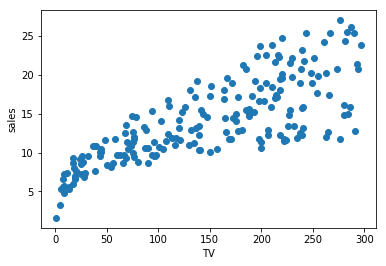

In [3]:
def plt_data(X,y):
    plt.figure()
    plt.scatter(X,y)
    plt.ylabel("sales")
    plt.xlabel("TV")

plt_data(data["TV"], data["sales"])

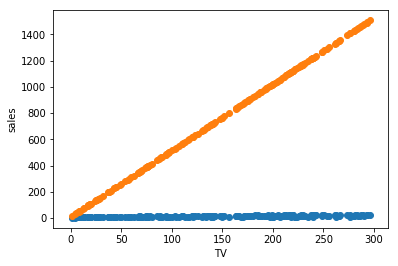

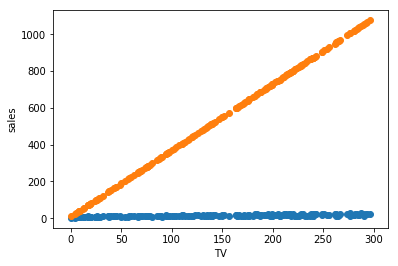

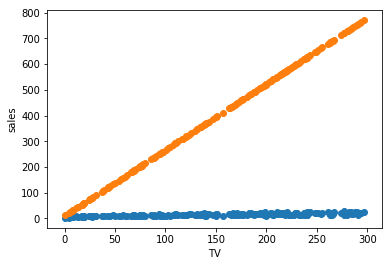

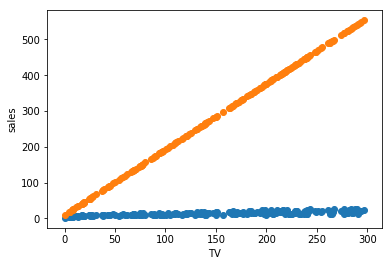

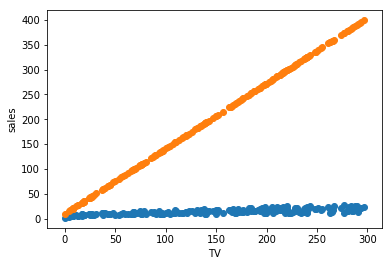

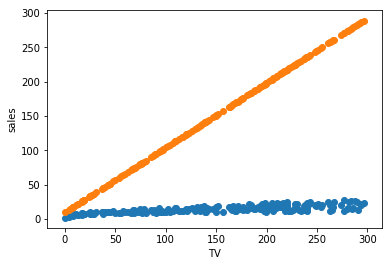

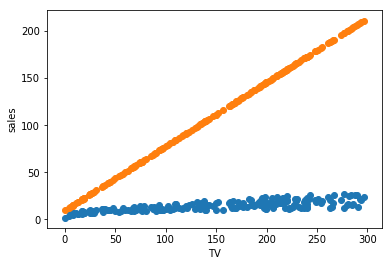

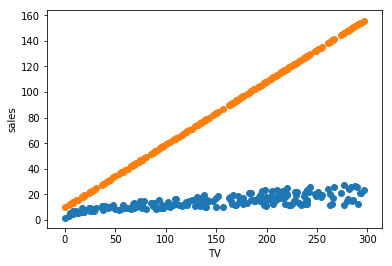

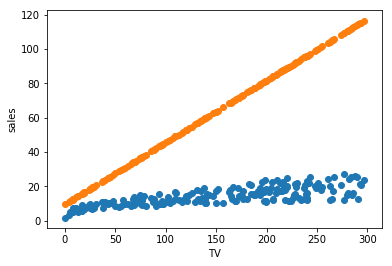

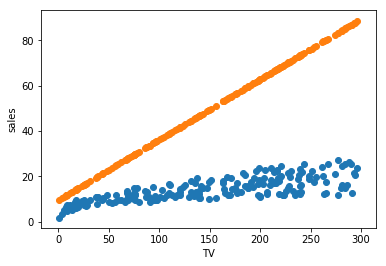

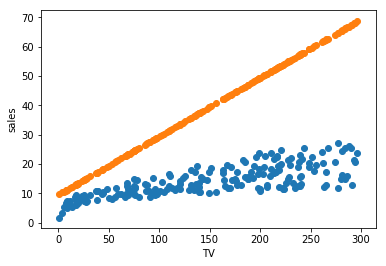

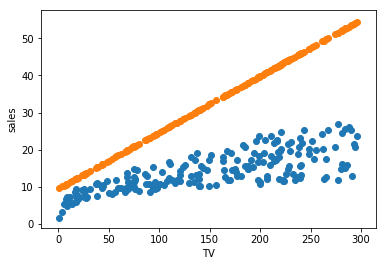

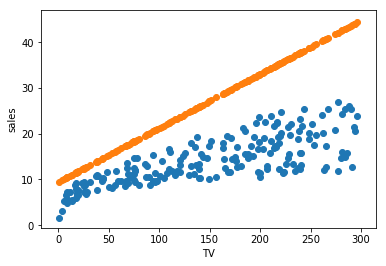

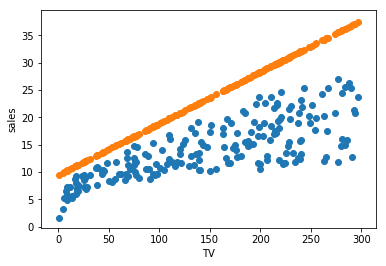

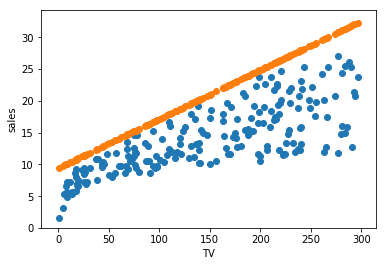

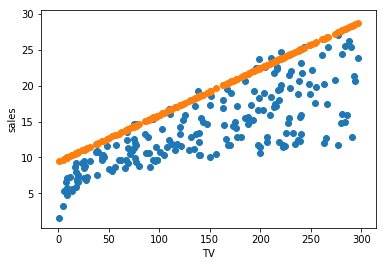

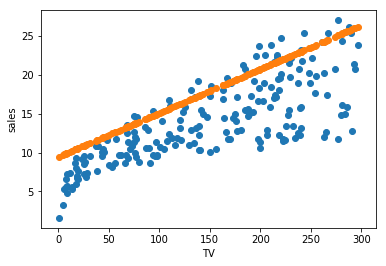

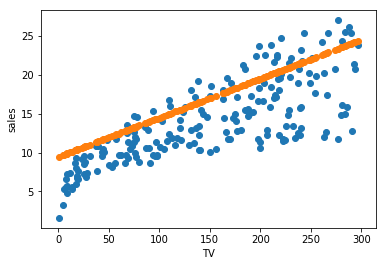

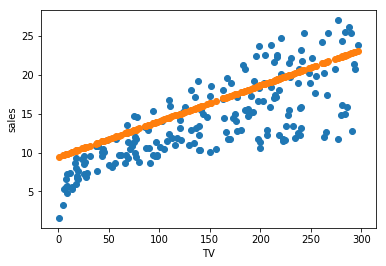

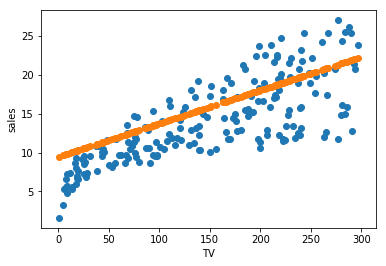

In [9]:
X = data["TV"]
y = data["sales"]

learning_rate = 1/100000
w0 = 10 * np.random.rand(1)
w1 = 10 * np.random.rand(1)

# Hypothesis
hypo = lambda w0, w1, x : w0 + w1*x
# obj. func
J = lambda w0, w1, X, y: (1/(2*X.size)) * (hypo(w0,w1,X) - y)**2
# derivative of obj. func
J_derivative_w1 = lambda w0, w1, X, y: (hypo(w0,w1,X) - y)*X
J_derivative_w0 = lambda w0, w1, X, y: (hypo(w0,w1,X) - y)


l = float("inf")

eps = 1/1000 
# loop until error is smaller then eps
it = 0
while (l - np.sum(J(w0,w1,X,y)))**2 > eps:
    l = np.sum(J(w0,w1,X,y))
    w1 = w1 - learning_rate * (1/X.size) * np.sum(J_derivative_w1(w0,w1,X,y))
    w0 = w0 - learning_rate * (1/X.size) * np.sum(J_derivative_w0(w0,w1,X,y))
    
    plt_data(X,y)
    plt.scatter(X,hypo(w0,w1,X))
    it += 1
    if it==20:
        break

# Exercise 1.2

Apply	the	linear	regression	implemented	in	Exercise	1.1	to	the	tvads-data.	Determine	a	suitable	learning	rate.	
Specify	this	learning	rate	and	create	the	following	two	plots:
<ul>
    <li> The tvads-data1 with the initial	(randomly	chosen)	and	the	final	hypothesis.</li>
    <li> The	error	(MSE)	as	a	function	of the number	of	iterations. </li>
</ul>

Error inf
Error 166087.88927125096
Error 29421.066974029694
Error 5211.693637603099
Error 923.2075656620328
Error 163.5384480890566
Error 28.969466153829018
Error 5.131701520237394
Error 0.9090402670974491
Error 0.16103039788242945
Error 0.028526306216116737
Error 0.005054131275023188
Error 0.0008961519434480536
Error 0.00015956659011528984
Error 2.9072218072911937e-05
Error 5.950135495425002e-06
Error 1.8516789532796452e-06
Error 1.1245835933593185e-06
[6.16442043]
[0.05194608]


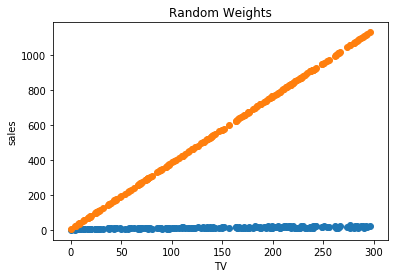

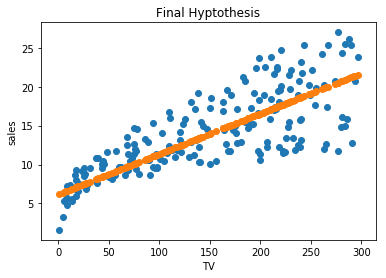

In [33]:
X = data["TV"]
y = data["sales"]

learning_rate = 1/100000
w0 = 10 * np.random.rand(1)
w1 = 10 * np.random.rand(1)

plt_data(X,y)
plt.scatter(X,hypo(w0,w1,X))
plt.title("Random Weights")

l = float("inf")

eps = 1/1000000
# loop until error is smaller then eps
while (l - np.sum(J(w0,w1,X,y)))**2 > eps**2:
    print("Error " + str((l - np.sum(J(w0,w1,X,y)))))
    l = np.sum(J(w0,w1,X,y))
    w1 = w1 - learning_rate * (1/X.size) * np.sum(J_derivative_w1(w0,w1,X,y))
    w0 = w0 - learning_rate * (1/X.size) * np.sum(J_derivative_w0(w0,w1,X,y))
    
plt_data(X,y)
plt.scatter(X,hypo(w0,w1,X))
plt.title("Final Hyptothesis")

print(w0)
print(w1)

# Exercise 1.3

Explore	the	behavior	of the gradient	descent	method	in	dependence	of	the	learning	rate.	For	this,	conduct	the	
following	experiment:	Use	the	learning	rate	from	Exercise	1.2	and	find	additionally	a	learning	rate	that	is	too	
small	and	a	learning	rate	that	is	too	large.	Apply	the	linear	regression	to the tvads-data for	these	three	learning	
rates	using the	same	initial	hypothesis	in	each	case.	Plot	the	error	(MSE)	as	a	function	of the number	of	iterations	
for	all	three	learning	rates into a	single	figure.	Discuss	your	results.

Text(0,0.5,'MSE')

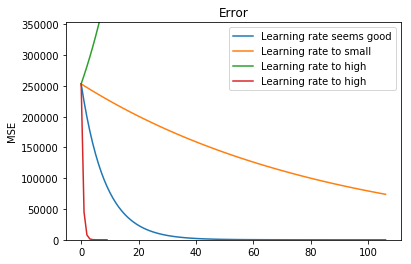

In [43]:
X = data["TV"].values
y = data["sales"].values

learning_rate = 1/1000000

w0 = 0
w1 = 10 * np.random.rand(1)
eps = 1/100

def lin_reg(w0,w1,X,y,learning_rate,eps):
    error = []
    l = float("inf")
    while (l - np.sum(J(w0,w1,X,y), dtype=np.float64))**2 > eps:
        l = np.sum(J(w0,w1,X,y), dtype=np.float64)
            
        error.append(l)
        w1 = w1 - learning_rate * (1/X.size) * np.sum(J_derivative_w1(w0,w1,X,y))
        w0 = w0 - learning_rate * (1/X.size) * np.sum(J_derivative_w0(w0,w1,X,y))
        
        if np.sum(J(w0,w1,X,y), dtype=np.float64) > 10**10:
            break
    return error


mse_s = np.array((lin_reg(w0,w1,X,y,learning_rate/10,eps)))
mse_r = np.array(lin_reg(w0,w1,X,y,learning_rate,eps))
mse_r2 = np.array(lin_reg(w0,w1,X,y,learning_rate*10,eps))
mse_h = np.array(lin_reg(w0,w1,X,y,learning_rate*35,eps))

plt.figure()
plt.title("Error")
plt.plot(mse_r,label="Learning rate seems good")
plt.plot(mse_s[:mse_r.size],label="Learning rate to small")
plt.plot(mse_h[:mse_r.size],label="Learning rate to high")
plt.plot(mse_r2[:mse_r.size],label="Learning rate to high")
plt.legend()
plt.ylim(0,np.array(mse_h).min()+100000)
plt.ylabel("MSE")

# Exercise 1.4

In [14]:
from scipy.stats import bernoulli

data_bern = bernoulli.rvs(size=1000,p=0.8)

print(data_bern)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1
 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

$ L(p) = \prod\limits_{i=1}^n p^{x_i}(1-p)^{1-x_i} $

$ l(p) = log(p)\sum\limits_{i=1}^n x_i + log(1-p)\sum\limits_{i=1}^n (1-x_i) $

$ \frac{\partial l(p)}{\partial p} = \frac{\sum_{i=1}^n x_i}{p} - \frac{\sum_{i=1}^n (1 - x_i)}{1 - p} = 0 $

$ p = \frac{1}{n} \sum\limits_{i=1}^n x_i $


In [15]:
p = (1/1000) * data_bern.sum()
print(p)

0.79
